## Plots from DEG hits post Seurat + Metascape analysis

##### 1. DEG list with fold-change and significance: p_val < 0.01 & avg_log2FC < -1 for down-regulation
##### 2. Up and down regulation pathway enrichment (focusing on down) to show what functions those perturbed gene programs do 
##### 3. From the bag-of-genes associated with those pathways > choose which genes are most important


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### FastIIB cell-type: Downregulated genes

In [5]:
# load DEGs (M+F DEG between WT and KO) downregulated csv in pandas

path_degs_fast2b = '/ix/djishnu/Zarifeh/ML_MM/Aditi/result/ClusterSpecific_Cells/DEGs_ALL/Only_Negative/FastIIB_NEG.csv'
#header is present
degs_fast2b = pd.read_csv(path_degs_fast2b, header=0)
deg_names_fast2b = degs_fast2b['Unnamed: 0']
deg_sig_fast2b = degs_fast2b['p_val_adj']
deg_log2fc_fast2b = degs_fast2b['avg_log2FC']
#convertlog2FC to ratio of fold change by exponentiating with base 2
degs_fast2b['avg_FC'] = 2**degs_fast2b['avg_log2FC']

In [6]:
# get top 50 gene names down regulated genes (file is already sorted by p_val_adj which uses bonferroni correction)
top_50_degs = degs_fast2b.head(50)

# Extract the necessary columns for plotting
gene_names = top_50_degs['Unnamed: 0']
fold_change = top_50_degs['avg_FC']
p_val_adj = top_50_degs['p_val_adj']



/tmp/ipykernel_34860/2456165023.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fold_change, y=gene_names, palette=colors)


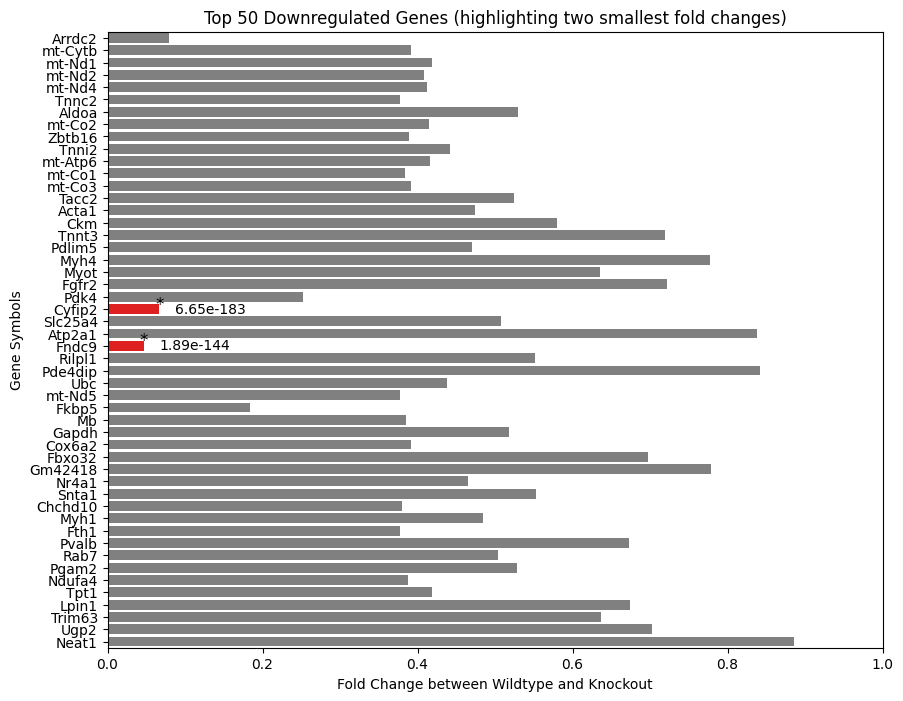

In [30]:
# plotting code
# Identify the two smallest fold change values
highlight = fold_change.nsmallest(2).values
highlight_indices = fold_change.nsmallest(2).index

# Define colors, highlighting the two smallest values
colors = ['red' if x in highlight else 'gray' for x in fold_change]

# Plot the bar plot for the top 50 genes (all pathways)
plt.figure(figsize=(10, 8))
sns.barplot(x=fold_change, y=gene_names, palette=colors)

#annotate with astreisk for the two smallest fold changes
for i in highlight_indices:
    plt.text(fold_change[i], i, '*', color='black', fontsize=12, ha='center')
    plt.text(fold_change[i] + 0.02, i, f"{p_val_adj[i]:.2e}", color = 'black', ha='left', va='center')

plt.xlabel('Fold Change between Wildtype and Knockout')
plt.ylabel('Gene Symbols')
plt.title('Top 50 Downregulated Genes (highlighting two smallest fold changes)')
plt.xlim(0, 1)
plt.show()

In [18]:
# load the gene list from excel to plot the fold-change of the Ribosomal associated pathway genes
ribosomal_pathway_associated_string = 'Rplp0,Fau,Rpsa,Rpl18,Rpl26,Rpl27,Rpl28,Rpl30,Rpl32,Rpl36a,Rpl7,Rps15,Rps16,Rps17,Rps24,Rps29,Rps3a1,Rps4x,Rps5,Rpl13a,Rpl8,Rps3,Rps26,Rplp1,Rps23,Rpl35,Rps10,Rpl39,Rpl37,Rpl38,Rpl24,Rps25,Rpl18a,Rps27a,Rpl23a,Rpl12,Rpl13,Rpl23,Rpl36al,Rplp2,Eif3g,Mrpl12,Mrpl14,Mrpl30,Eef1a1,C3,Fos,Il6ra,Pik3r1,Lgals4,Abca8a,Psmb4,Psmb5,Ubc,Zfp36,Sf3b5,Glul,Oat,Acot2'
ribosomal_pathway_associated_genes = ribosomal_pathway_associated_string.split(',') #list of 59 elements

#get the subset of degs_fast2b for these genes (all 59 present)

ribosomal_pathway_associated_degs = degs_fast2b[degs_fast2b['Unnamed: 0'].isin(ribosomal_pathway_associated_genes)]



/tmp/ipykernel_34860/1800039078.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ribo_fold_change, y=ribo_gene_names, palette=r_colors)


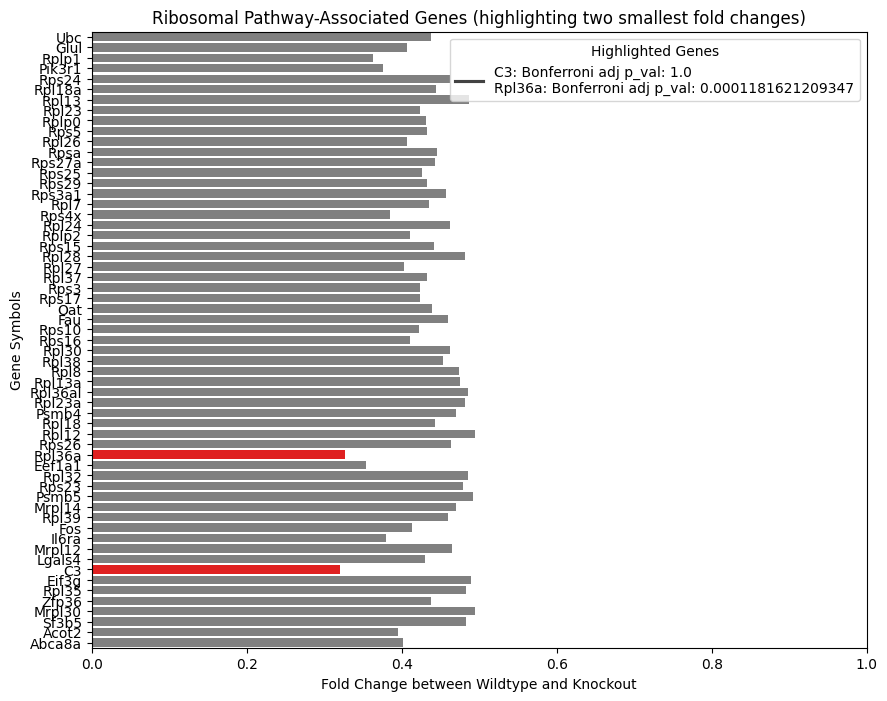

In [29]:
# plot ribosomal pathway associated genes
ribo_gene_names = ribosomal_pathway_associated_degs['Unnamed: 0']
ribo_fold_change = ribosomal_pathway_associated_degs['avg_FC']
ribo_p_val_adj = ribosomal_pathway_associated_degs['p_val_adj']
# Identify the two smallest fold change values
r_highlight = ribo_fold_change.nsmallest(2).values
r_highlight_indices = ribo_fold_change.nsmallest(2).index

# Define colors, highlighting the two smallest values
r_colors = ['red' if x in r_highlight else 'gray' for x in ribo_fold_change]

# Plot the bar plot for the ribosomal pathway-associated genes
plt.figure(figsize=(10, 8))
sns.barplot(x=ribo_fold_change, y=ribo_gene_names, palette=r_colors)
plt.xlabel('Fold Change between Wildtype and Knockout')
plt.ylabel('Gene Symbols')
plt.title('Ribosomal Pathway-Associated Genes (highlighting two smallest fold changes)')
plt.xlim(0, 1)

# Add legend with adjusted p-values for the two smallest fold changes
highlight_text = '\n'.join([f"{ribo_gene_names[i]}: Bonferroni adj p_val: {ribo_p_val_adj[i]}" for i in r_highlight_indices])
plt.legend([highlight_text], title="Highlighted Genes", loc='upper right')
plt.show()



